In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import geocoder
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("./cleaned_train.csv")
test = pd.read_csv("./cleaned_test.csv")

## Train and test exploration

In [13]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [14]:
train.head(3)

,Street,From,To,Date,Time,Real.Spots,Street.Length,any_spot,street_from,street_to,from_lat,from_long,to_lat,to_long,block_lat,block_long,hour,month,dayofweek,is_weekend
0,Mission Street,25th Street,26th Street,2014-01-07,16:19,4,179.13297,1,"Mission Street & 25th Street, San Francisco CA","Mission Street & 26th Street, San Francisco CA",37.750648,-122.418316,37.749044,-122.418166,37.749846,-122.418241,16,1,1,0
1,Polk Street,Ellis Street,Olive Street,2014-01-18,20:42,0,52.74021,0,"Polk Street & Ellis Street, San Francisco CA","Polk Street & Olive Street, San Francisco CA",37.784040,-122.419381,37.784507,-122.419478,37.784273,-122.419429,20,1,5,1
2,Van Ness Avenue,Geary Boulevard,Myrtle Street,2014-01-18,20:39,0,52.51784,0,"Van Ness Avenue & Geary Boulevard, San Francis...","Van Ness Avenue & Myrtle Street, San Francisco CA",37.785660,-122.421476,37.785241,-122.421234,37.785451,-122.421355,20,1,5,1


In [15]:
train.shape

(1100, 20)

In [16]:
test.shape

(726, 18)

In [6]:
print('Max date in train is {}'.format( train['Date'].max() ))
print('Min date in train is {}'.format( train['Date'].min() ))

print('Max date in test is {}'.format( test['Date'].max() ))
print('Min date in test is {}'.format( test['Date'].min() ))

Max date in train is 2014-03-28
Min date in train is 2014-01-07
Max date in test is 2016-11-04
Min date in test is 2014-03-28


In [24]:
#check to see if we have an even distibution of data across hours
train.groupby(['hour','any_spot'])['any_spot'].count()

hour  any_spot
7     0           40
      1           23
8     0           23
      1           13
9     0           30
      1           28
10    0           26
      1            6
11    0           24
      1            7
12    0           25
      1            8
13    0           62
      1           39
14    0           64
      1           45
15    0           46
      1           51
16    0           56
      1           42
17    0           32
      1           29
18    0           66
      1           33
19    0           66
      1           27
20    0           71
      1           22
21    0           65
      1           26
22    0            3
      1            2
Name: any_spot, dtype: int64

In [92]:
# look at count of any_spot by hour
train.groupby(['is_weekend', 'any_spot'])['any_spot'].count()

is_weekend  any_spot
0           0           478
            1           227
1           0           221
            1           174
Name: any_spot, dtype: int64

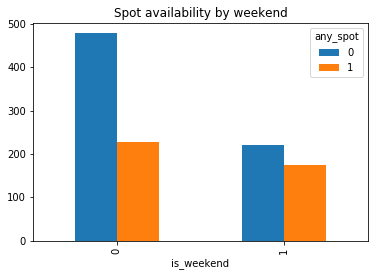

In [103]:
train.groupby(['is_weekend', 'any_spot'])['any_spot'].count().unstack().plot.bar()
plt.title('Spot availability by weekend')
plt.show()
plt.savefig('test.png', bbox_inches='tight')

In [105]:
train.groupby(['hour'])['any_spot'].count()

hour
7      63
8      36
9      58
10     32
11     31
12     33
13    101
14    109
15     97
16     98
17     61
18     99
19     93
20     93
21     91
22      5
Name: any_spot, dtype: int64

In [112]:
# look at count of any_spot by hour
train.groupby(['hour', 'any_spot'])['any_spot'].count()

hour  any_spot
7     0           40
      1           23
8     0           23
      1           13
9     0           30
      1           28
10    0           26
      1            6
11    0           24
      1            7
12    0           25
      1            8
13    0           62
      1           39
14    0           64
      1           45
15    0           46
      1           51
16    0           56
      1           42
17    0           32
      1           29
18    0           66
      1           33
19    0           66
      1           27
20    0           71
      1           22
21    0           65
      1           26
22    0            3
      1            2
Name: any_spot, dtype: int64

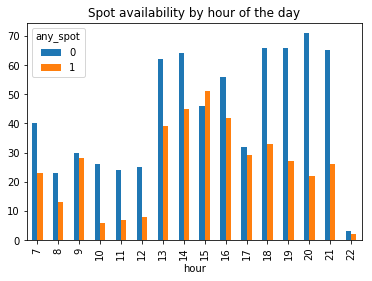

In [113]:
# look at count of any_spot by hour
train.groupby(['hour', 'any_spot'])['any_spot'].count().unstack().plot.bar()
plt.title('Spot availability by hour of the day')
plt.show()
plt.savefig('test.png', bbox_inches='tight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb6b978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fbb40b8>]], dtype=object)

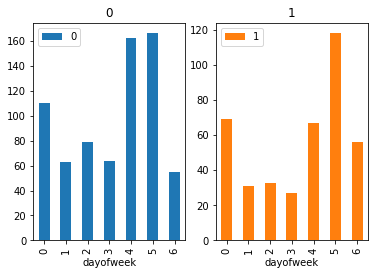

In [20]:
#look at any_spot by weekday
ag = train.groupby('dayofweek').any_spot.value_counts().sort_index()
ag.unstack().plot(kind = 'bar', subplots = True, layout = (1,2))

In [28]:
#check to see if we have an even distibution of data across streets
train.groupby(['Street','any_spot'])['any_spot'].count()

Street              any_spot
23rd Street         0            36
                    1            40
Battery Street      0            12
                    1             4
Bryant Street       0             3
                    1            15
Bush Street         0            13
                    1            10
Columbus Avenue     0             5
                    1             1
Geary Street        0            11
                    1            12
Grove Street        0             7
                    1             7
Hyde Street         0             6
                    1             4
Jackson Street      0             5
                    1             9
Jessie Street       0             6
Jones Street        0            31
                    1            13
Kearny Street       0            32
                    1             3
Larkin Street       0            47
                    1            23
Leavenworth Street  0             6
                    1            13

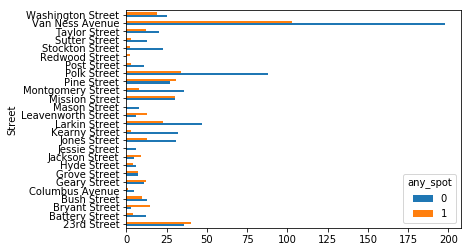

In [27]:
# look at count of any_spot by street
train.groupby(['Street', 'any_spot'])['any_spot'].count().unstack().plot.barh()

In [63]:
train['Real.Spots'].sum()

1899

In [80]:
train_cnts = train.groupby('Street')['Real.Spots'].agg(['mean'])
train_cnts

,mean
Street,
23rd Street,5.013158
Battery Street,1.250000
Bryant Street,3.666667
Bush Street,0.869565
Columbus Avenue,0.166667
Geary Street,5.000000
Grove Street,1.500000
Hyde Street,2.700000
Jackson Street,1.571429


In [78]:
train_cnts = train.groupby('Street')['any_spot'].agg(['sum','count'])
train_cnts['pct_time_spot_is_avail'] = train_cnts['sum']*100/train_cnts['count']
train_cnts.sort_values('count')

,sum,count,pct_time_spot_is_avail
Street,,,
Redwood Street,2,2,100.000000
Jessie Street,0,6,0.000000
Columbus Avenue,1,6,16.666667
Mason Street,0,8,0.000000
Hyde Street,4,10,40.000000
Jackson Street,9,14,64.285714
Post Street,3,14,21.428571
Grove Street,7,14,50.000000
Sutter Street,3,16,18.750000


In [86]:
train_blocks = train.groupby('street_from')['Real.Spots'].agg(['mean'])
train_blocks

,mean
street_from,
"23rd Street & Bartlett Street, San Francisco CA",1.117647
"23rd Street & Mission Street, San Francisco CA",1.447368
"23rd Street & South Van Ness Avenue, San Francisco CA",14.619048
"Battery Street & California Street, San Francisco CA",0.833333
"Battery Street & Halleck Street, San Francisco CA",1.400000
"Battery Street & Washington Street, San Francisco CA",1.600000
"Bryant Street & Mariposa Street, San Francisco CA",3.666667
"Bush Street & Parking Entrance Lane, San Francisco CA",0.333333
"Bush Street & Taylor Street, San Francisco CA",1.214286


In [79]:
train_blocks = train.groupby('street_from')['any_spot'].agg(['sum','count'])
train_blocks['pct_time_spot_is_avail'] = train_blocks['sum']*100/train_blocks['count']
train_blocks.sort_values('count')

,sum,count,pct_time_spot_is_avail
street_from,,,
"Redwood Street & Polk Street, San Francisco CA",2,2,100.000000
"Stockton Street & Stockton Tunnel, San Francisco CA",0,4,0.000000
"Pine Street & Montgomery Street, San Francisco CA",1,4,25.000000
"Montgomery Street & Bush Street, San Francisco CA",0,5,0.000000
"Kearny Street & Post Street, San Francisco CA",0,5,0.000000
"Kearny Street & Hardie Place, San Francisco CA",0,5,0.000000
"Montgomery Street & Clay Street, San Francisco CA",0,5,0.000000
"Battery Street & Washington Street, San Francisco CA",2,5,40.000000
"Battery Street & Halleck Street, San Francisco CA",1,5,20.000000


Text(0.5,0,'Street Length')

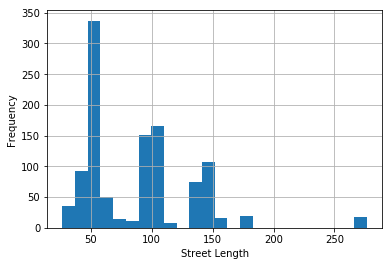

In [29]:
#dist of street length
train['Street.Length'].hist(bins = 24)
plt.ylabel("Frequency")
plt.xlabel("Street Length")

In [30]:
#add Block ID for each street-from-to combo
train['block_id'] = train.groupby(['Street','From','To']).ngroup()
test['block_id'] = test.groupby(['Street','From','To']).ngroup()

In [32]:
len(train['block_id'].unique())

93

In [33]:
len(test['block_id'].unique())

93

## Sensor exploration

In [114]:
sensor = pd.read_csv("./geocoded_sensor_all.csv")
sensor.head(3)

,Unnamed: 0,BLOCK_ID,STREET_NAME,BLOCK_NUM,STREET_BLOCK,AREA_TYPE,PM_DISTRICT_NAME,RATE,START_TIME_DT,TOTAL_TIME,...,COMM_UNKNOWN_TIME,CAL_MONTH_NAME,CAL_YEAR,CAL_DATE,DAY_TYPE,TIME_OF_DAY,STREET_BLOCK_renamed,coord_block,block_lat,block_long
0,2,50001,jackson street,1.0,JACKSON ST 100,Pilot,Downtown,NaN,01-jul-2012 02:00:00,79200.0,...,0.0,July,2012.0,01-jul-2012,weekend,200.0,"JACKSON ST 100, San Francisco, CA","[37.7970989, -122.3983614]",37.797099,-122.398361
1,3,50002,jackson street,2.0,JACKSON ST 200,Pilot,Downtown,NaN,01-jul-2012 08:00:00,82800.0,...,0.0,July,2012.0,01-jul-2012,weekend,800.0,"JACKSON ST 200, San Francisco, CA","[37.7970291, -122.3999589]",37.797029,-122.399959
2,11,50004,jackson street,4.0,JACKSON ST 400,Pilot,Downtown,NaN,01-jul-2012 21:00:00,118800.0,...,0.0,July,2012.0,01-jul-2012,weekend,2100.0,"JACKSON ST 400, San Francisco, CA","[37.7966327, -122.4018831]",37.796633,-122.401883


In [117]:
sensor['hour'] = sensor['TIME_OF_DAY'].apply(lambda x: x/100).astype(int)

In [119]:
sensor.groupby(['hour'])['BLOCK_ID'].count()

hour
0     91570
1     91570
2     91571
3     91571
4     91571
5     91572
6     91573
7     91573
8     91573
9     91573
10    91573
11    91575
12    91577
13    91578
14    91580
15    91581
16    91582
17    91583
18    91583
19    91583
20    91584
21    91584
22    91587
23    91588
Name: BLOCK_ID, dtype: int64